## PROBLEM STATEMENT
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* **Which variables are significant in predicting the price of a car**
* **How well those variables describe the price of a car**

## BUSINESS GOAL

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Step 1: Read & understand the data

In [1]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import pickle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, r2_score

In [2]:
#Loading the csv data file from the folder

df_auto = pd.read_csv('CarPrice.csv')
df_auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Shape of dataset

print('Dataframe shape: {}'.format(df_auto.shape))

Dataframe shape: (205, 26)


In [4]:
#Features info
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

* From the above output it is evident that there are no null values

Viewing statistical information about numerical features

In [5]:
df_auto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 2: Data Cleaning

In [6]:
#car_ID column in irrelevant, hence we can drop it

df_auto.drop(columns=['car_ID'],inplace=True)
print('Dataframe shape: {}'.format(df_auto.shape))

Dataframe shape: (205, 25)


In [7]:
#Datatypes of the features

df_auto.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
#Replacing CarName with the name of the company
df_auto['CarName'] = df_auto['CarName'].str.split(' ',expand=True)

In [9]:
#Unique values of carName
df_auto['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Spelling errors in the CarName columns**

* maxda -> mazda
* Nissan -> nissan
* porcshce -> porsche
* toyouta -> toyota
* vokswagen -> volkswagen
* vw -> volkswagen

In [10]:
#Distribution before name correction
df_auto['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
maxda           2
vw              2
vokswagen       1
mercury         1
porcshce        1
toyouta         1
Nissan          1
Name: CarName, dtype: int64

In [11]:
#Replacing incorrect spellings with correct ones
df_auto['CarName'] = df_auto['CarName'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})

In [12]:
#Distribution after name correction
df_auto['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64

Datatype of symboling needs to be changed to string (as per Data Dictionary.xlsx)

In [13]:
df_auto['symboling'] = df_auto['symboling'].astype(str)

In [14]:
duplicate = df_auto[df_auto.duplicated()]
print('Count of duplicate entries: {}'.format(len(duplicate)))

Count of duplicate entries: 0


In [15]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

* Categorical - Object
* Numerical - int64, float64 

Seperating categorical and numerical features

In [16]:
#Storing object dtypes in cat_cols 
cat_cols = df_auto.select_dtypes(include=['object']).columns

#Storing int64 and float64 dtypes in num_cols
num_cols = df_auto.select_dtypes(exclude=['object']).columns

In [17]:
print('Total numerical columns:', len(num_cols))
print('Total categorical columns:', len(cat_cols))

Total numerical columns: 14
Total categorical columns: 11


### Step 3: Visualizing Data

**1. CAR NAME**

Text(0, 0.5, 'Count')

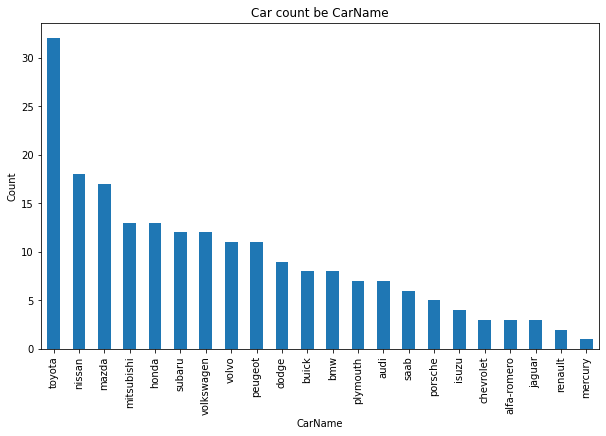

In [18]:
plt.figure(figsize=(10,6))
df_auto['CarName'].value_counts().plot(kind='bar')
plt.title("Car count be CarName")
plt.xlabel('CarName')
plt.ylabel('Count')

In [19]:
df_auto['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64

**INFERENCE**
* Most favoured car - Toyota
* Least favoured car - Mercury

**2. CAR PRICE**

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

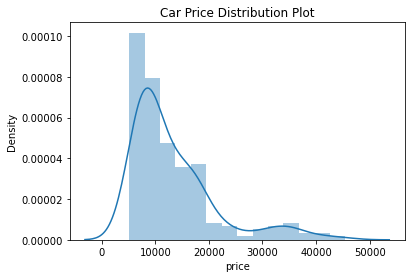

In [20]:
plt.title('Car Price Distribution Plot')
sns.distplot(df_auto['price'])

**INFERENCE**
* Price of most of the cars are within 20000

**3. NUMERIC VARIABLES**

<Figure size 1440x1440 with 0 Axes>

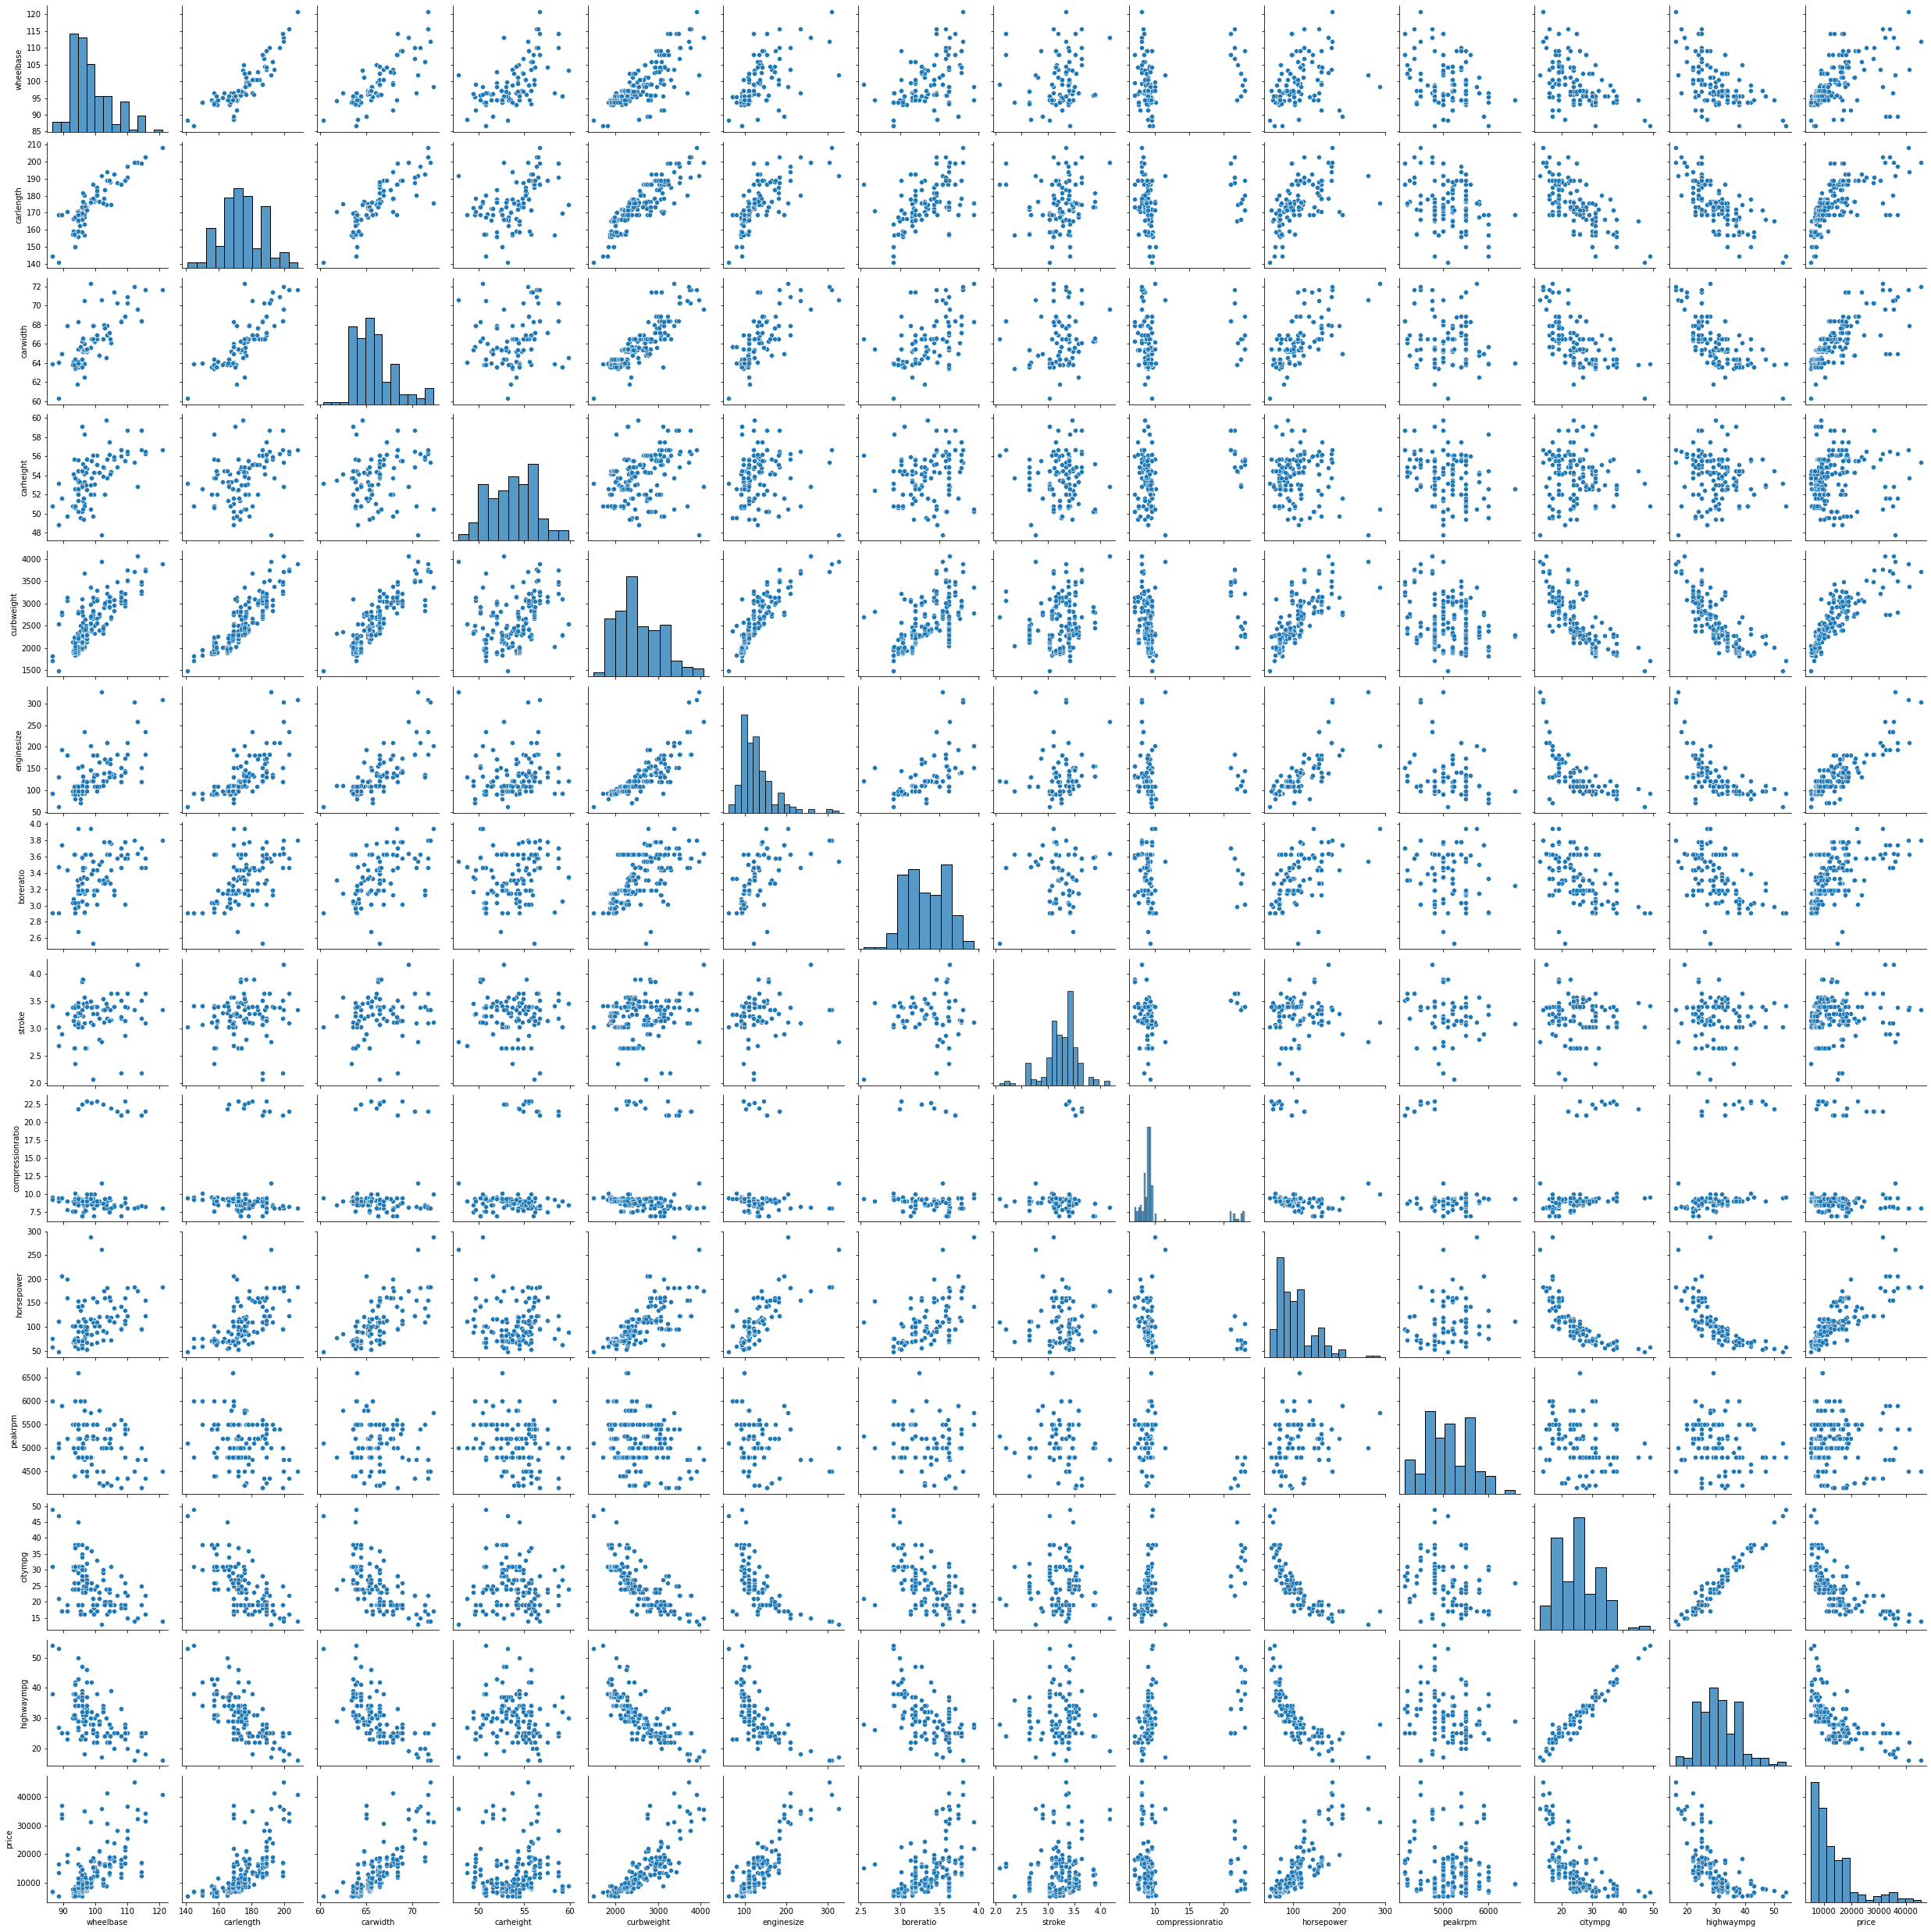

In [21]:
plt.figure(figsize=(20,20))
sns.pairplot(df_auto[num_cols])

**INFERENCE**
* carlength, carwidth, curbweight, enginesize, horsepower seem to be positively corelated with price
* citympg, highwaympg seem to be negtively corelated with price
* carheight does not seem to be corelated with price

Corelation between features- 

In [22]:
df_auto.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


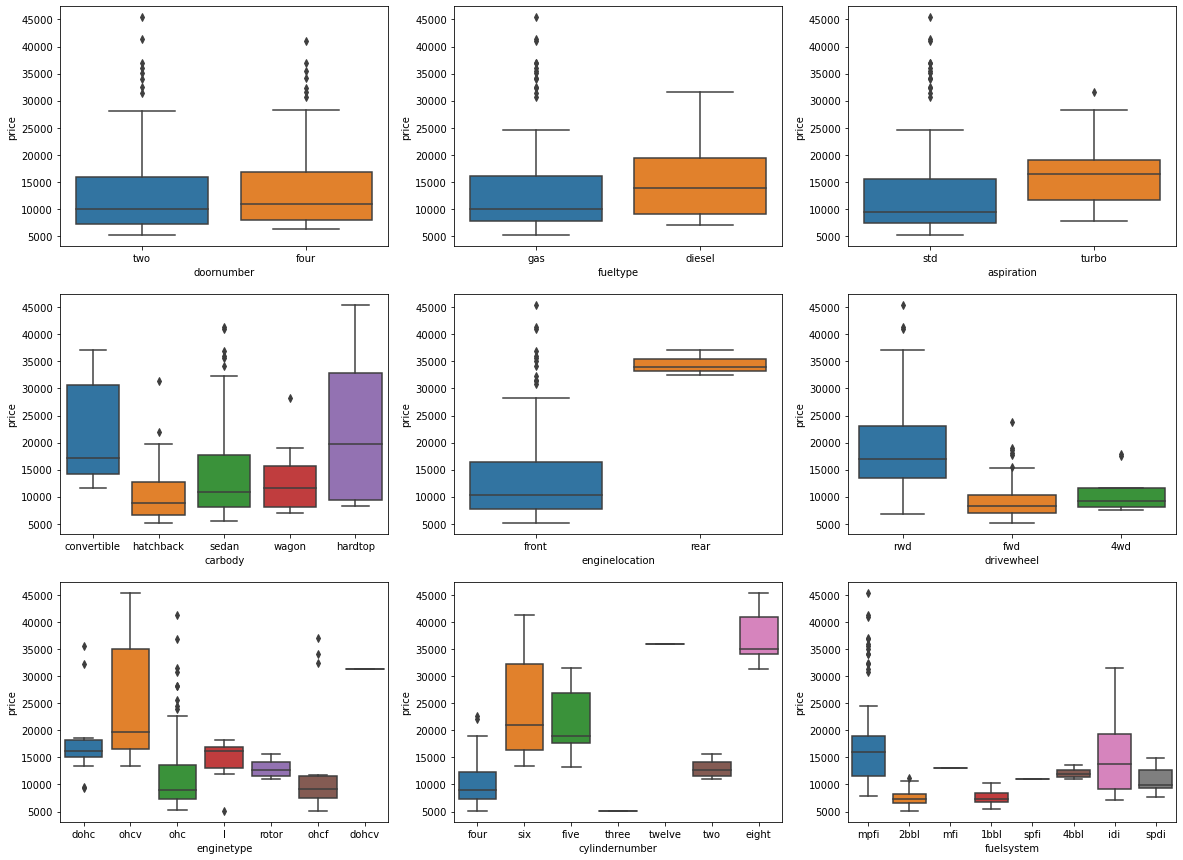

In [23]:
#Boxplot of different featues with respect to price

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df_auto)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df_auto)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_auto)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_auto)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_auto)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_auto)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df_auto)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_auto)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_auto)
plt.show()

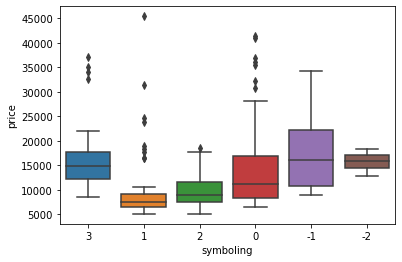

In [24]:
sns.boxplot(x = 'symboling', y = 'price', data = df_auto)
plt.show()

**INFERENCE**
* Door number does not seem to have a significant effect on the price. The average price of a 2 door is ~ the average price of a 4 door

* Diesel cars (fuel type) are comparitavely expensive than gas cars

* Covertible and hardtop carbody types are more expensive than cars with hatchback/sedan/wagon bodytype

* No of cylinders and symboling impact the price

* rear engineLocation cars are way more expensive than front engineLocation

* Cars with drivewheel type rwd are more expensive than fwd or 4wd types

* EngineType ohcv are found in expensive cars


[Text(0.5, 0, 'Fuel System'), Text(0, 0.5, 'Frequency')]

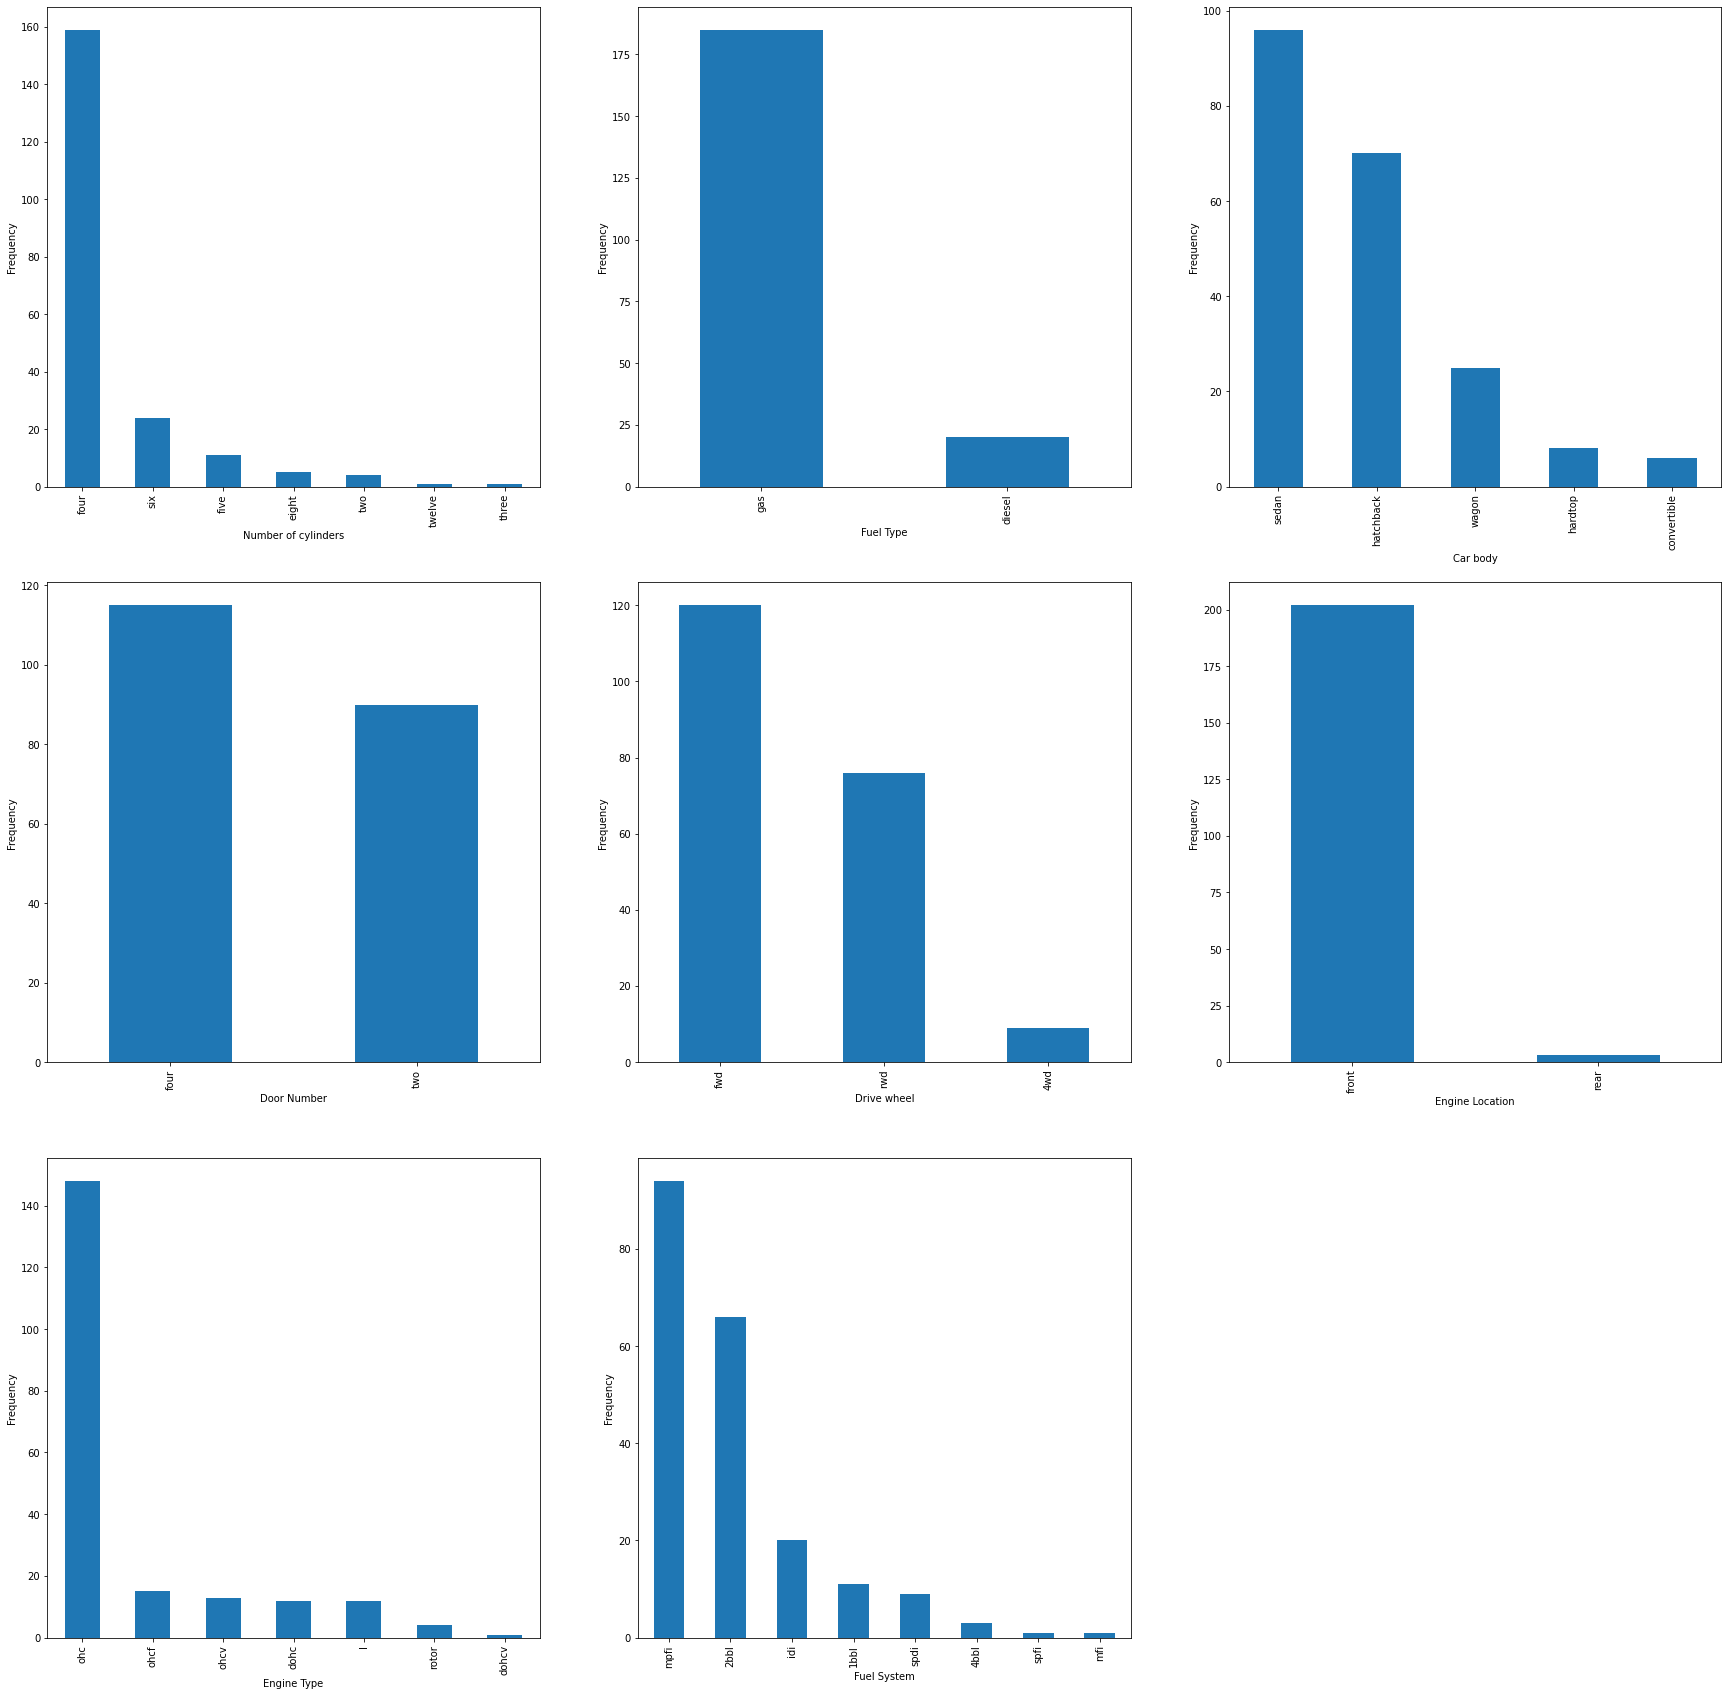

In [25]:
#Categorical variables and the frequency of individual values

plt.figure(figsize=(30,30))

plt.subplot(3,3,1)
cyl_no = df_auto['cylindernumber'].value_counts().plot(kind='bar')
cyl_no.set(xlabel = 'Number of cylinders', ylabel='Frequency')

plt.subplot(3,3,2)
cyl_no = df_auto['fueltype'].value_counts().plot(kind='bar')
cyl_no.set(xlabel = 'Fuel Type', ylabel='Frequency')

plt.subplot(3,3,3)
cyl_no = df_auto['carbody'].value_counts().plot(kind='bar')
cyl_no.set(xlabel = 'Car body', ylabel='Frequency')


plt.subplot(3,3,4)
cyl_no = df_auto['doornumber'].value_counts().plot(kind='bar')
cyl_no.set(xlabel = 'Door Number', ylabel='Frequency')

plt.subplot(3,3,5)
cyl_no = df_auto['drivewheel'].value_counts().plot(kind='bar')
cyl_no.set(xlabel = 'Drive wheel', ylabel='Frequency')

plt.subplot(3,3,6)
cyl_no = df_auto['enginelocation'].value_counts().plot(kind='bar')
cyl_no.set(xlabel = 'Engine Location', ylabel='Frequency')

plt.subplot(3,3,7)
cyl_no = df_auto['enginetype'].value_counts().plot(kind='bar')
cyl_no.set(xlabel = 'Engine Type', ylabel='Frequency')

plt.subplot(3,3,8)
cyl_no = df_auto['fuelsystem'].value_counts().plot(kind='bar')
cyl_no.set(xlabel = 'Fuel System', ylabel='Frequency')

**INFERENCE**

Most common types are:
* cylinder - 4cylinder
* Fuel type - gas
* Car body - sedan
* Door number - 4 door
* Drive wheel - fwd
* Engine Location - front
* Engine type - ohc
* Fuel system - mpfi

In [26]:
df_auto.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Average prices of cars of all companies

<Figure size 1440x432 with 0 Axes>

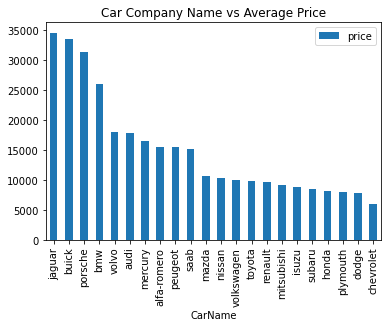

In [27]:
plt.figure(figsize=(20, 6))

avg_price = pd.DataFrame(df_auto.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
avg_price.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

**INFERENCE**
* Top 3 brands with highest average price- Jaguar, Buick, Porsche
* Top 3 brands with least average price- chevrolet, Dodge, Plymouth

<Figure size 1440x432 with 0 Axes>

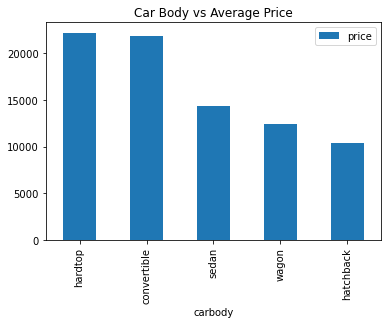

In [28]:
plt.figure(figsize=(20, 6))

df_autoy = pd.DataFrame(df_auto.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Body vs Average Price')
plt.show()

**INFERENCE**
* Most expensive bodytype- hardtop, convertible
* Least expensive bodytype- hatchback

### Step 4: Preparing the data

##### From the above observations we can see that the significant variables are-

- Categorical -> fueltype, aspiration, carbody, drivewheel, enginetype, cylindernumber

- Numerical -> wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower, citympg, highwaympg, symboling

- Add enginelocation and check

In [29]:
df_auto['aspiration']

0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [30]:
df_auto.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


In [31]:
#Based on the above observations, selecting the significant features

sig_cat_cols = ['fueltype','carbody','aspiration','drivewheel','cylindernumber','enginetype']

sig_num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','symboling','citympg','highwaympg','price']

sig_cols = sig_cat_cols + sig_num_cols

print('Significant Columns:  {}'.format(sig_cols))

Significant Columns:  ['fueltype', 'carbody', 'aspiration', 'drivewheel', 'cylindernumber', 'enginetype', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'symboling', 'citympg', 'highwaympg', 'price']


In [32]:
df_auto_copy = df_auto.copy()

In [33]:
df_auto = df_auto[sig_cols]

In [34]:
df_auto

,fueltype,carbody,aspiration,drivewheel,cylindernumber,enginetype,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,symboling,citympg,highwaympg,price
0,gas,convertible,std,rwd,four,dohc,88.6,168.8,64.1,2548,130,3.47,111,3,21,27,13495.0
1,gas,convertible,std,rwd,four,dohc,88.6,168.8,64.1,2548,130,3.47,111,3,21,27,16500.0
2,gas,hatchback,std,rwd,six,ohcv,94.5,171.2,65.5,2823,152,2.68,154,1,19,26,16500.0
3,gas,sedan,std,fwd,four,ohc,99.8,176.6,66.2,2337,109,3.19,102,2,24,30,13950.0
4,gas,sedan,std,4wd,five,ohc,99.4,176.6,66.4,2824,136,3.19,115,2,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,sedan,std,rwd,four,ohc,109.1,188.8,68.9,2952,141,3.78,114,-1,23,28,16845.0
201,gas,sedan,turbo,rwd,four,ohc,109.1,188.8,68.8,3049,141,3.78,160,-1,19,25,19045.0
202,gas,sedan,std,rwd,six,ohcv,109.1,188.8,68.9,3012,173,3.58,134,-1,18,23,21485.0
203,diesel,sedan,turbo,rwd,six,ohc,109.1,188.8,68.9,3217,145,3.01,106,-1,26,27,22470.0


In [35]:
#One hot encoding the categorical variables

cat_dummies = pd.get_dummies(df_auto[sig_cat_cols],drop_first=True)
cat_dummies

,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_turbo,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
201,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
202,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
203,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [36]:
#Adding the one hot encoded variables to the orignal dataframe and removing the older columns
df_auto = pd.concat([df_auto, cat_dummies],axis=1)

df_auto.drop(sig_cat_cols, axis=1, inplace=True)
df_auto.shape

(205, 31)

**TRAIN AND TEST SPLIT**

In [37]:
df_train, df_test = train_test_split(df_auto, test_size=0.2, random_state=42)

In [38]:
print('Train data: {}'.format(df_train.shape))
print('Test data: {}'.format(df_test.shape))

Train data: (164, 31)
Test data: (41, 31)


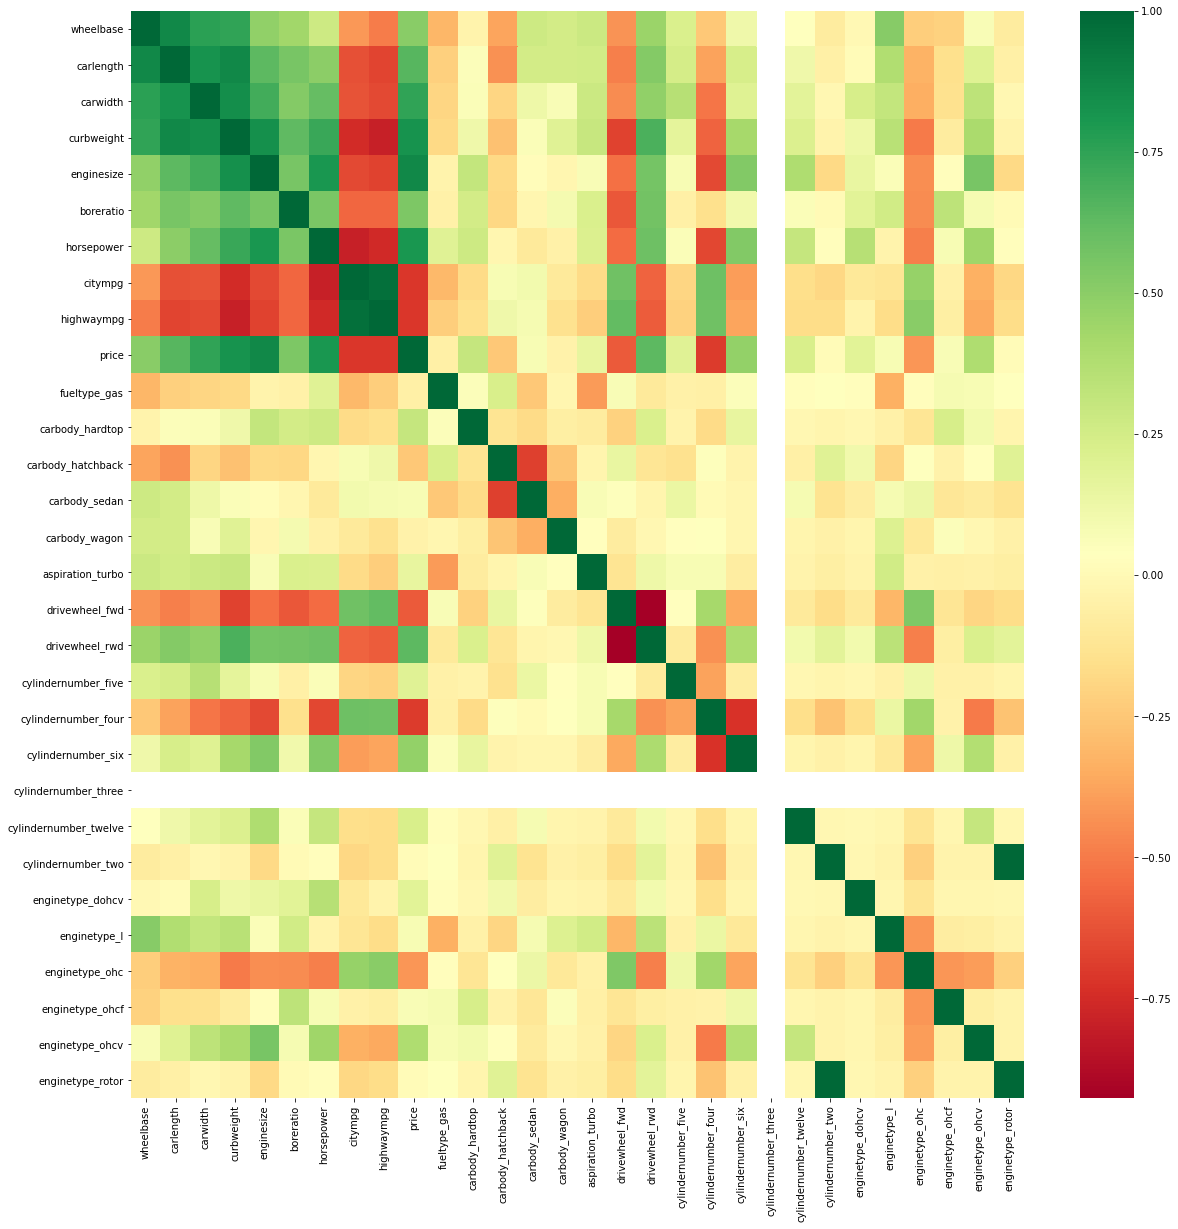

In [39]:
#Checking corelation for significant features

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

In [40]:
#Corelation of features with price       
df_train.corrwith(df_train['price']).sort_values(ascending=False)

price                    1.000000
enginesize               0.866433
curbweight               0.824212
horsepower               0.810986
carwidth                 0.744310
carlength                0.652071
drivewheel_rwd           0.633414
boreratio                0.546099
wheelbase                0.506118
cylindernumber_six       0.474372
enginetype_ohcv          0.389701
carbody_hardtop          0.300753
cylindernumber_twelve    0.231012
cylindernumber_five      0.191209
enginetype_dohcv         0.184361
aspiration_turbo         0.152425
enginetype_l             0.078666
carbody_sedan            0.075011
enginetype_ohcf          0.068625
cylindernumber_two       0.008630
enginetype_rotor         0.008630
carbody_wagon           -0.042352
fueltype_gas            -0.057172
carbody_hatchback       -0.246042
enginetype_ohc          -0.421905
drivewheel_fwd          -0.597568
cylindernumber_four     -0.700109
citympg                 -0.711245
highwaympg              -0.713503
cylindernumber

**Variables which are highly positively or negatively corelated - enginesize, curbweight, horsepower, carwidth, highwaympg, citympg**

In [41]:
#Splitting into dependent and independent variables
y_train = df_train.pop('price')
X_train = df_train

In [42]:
#Statistical information on numerical features
X_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,98.728659,174.127439,65.922561,2556.439024,126.414634,3.320854,104.701220,25.073171,30.573171,0.908537,...,0.121951,0.0,0.006098,0.018293,0.006098,0.067073,0.707317,0.067073,0.060976,0.018293
std,5.968884,12.080544,2.123469,511.935461,40.469014,0.269766,40.228058,6.164972,6.435199,0.289150,...,0.328232,0.0,0.078087,0.134418,0.078087,0.250915,0.456388,0.250915,0.240018,0.134418
min,86.600000,144.600000,61.800000,1819.000000,70.000000,2.540000,52.000000,13.000000,16.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.675000,64.175000,2163.000000,98.000000,3.150000,71.500000,19.000000,25.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,96.750000,173.100000,65.500000,2422.500000,119.500000,3.310000,95.000000,24.000000,30.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,102.100000,183.200000,66.675000,2939.250000,141.000000,3.540000,116.000000,30.000000,34.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,115.600000,202.600000,72.300000,4066.000000,326.000000,3.940000,288.000000,45.000000,50.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
total_cols = X_train.columns

From the above table it is visible that the values are not in the same scale. We will use Standard Scaler to address this.

In [44]:
scaler = StandardScaler()
X_train[total_cols] = scaler.fit_transform(X_train[total_cols])
X_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,symboling,citympg,highwaympg,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
66,1.037085,0.072450,0.083817,0.281287,0.188010,0.405836,-0.815386,-0.727380,0.964316,1.313501,...,-0.372678,0.0,-0.078326,-0.136505,-0.078326,-0.268133,0.643268,-0.268133,-0.254824,-0.136505
111,1.541231,1.043916,1.170268,1.016045,-0.158993,0.517384,-0.241894,-0.727380,-0.988126,-1.024569,...,-0.372678,0.0,-0.078326,-0.136505,-0.078326,3.729489,-1.554563,-0.268133,-0.254824,-0.136505
153,-0.508962,-0.367616,-1.097108,-0.541642,-0.852999,-1.007108,-1.064730,-0.727380,0.964316,1.001758,...,-0.372678,0.0,-0.078326,-0.136505,-0.078326,-0.268133,0.643268,-0.268133,-0.254824,-0.136505
96,-0.710620,-0.732953,-1.002634,-1.147082,-0.729070,-0.635281,-0.890189,0.078636,0.964316,1.001758,...,-0.372678,0.0,-0.078326,-0.136505,-0.078326,-0.268133,0.643268,-0.268133,-0.254824,-0.136505
38,-0.374523,-0.550285,-0.341316,-0.524008,-0.406852,-0.635281,-0.466304,-0.727380,0.313502,0.378273,...,-0.372678,0.0,-0.078326,-0.136505,-0.078326,-0.268133,0.643268,-0.268133,-0.254824,-0.136505


In [45]:
X_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,symboling,citympg,highwaympg,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
count,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,...,1.640000e+02,164.0,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02
mean,-8.692234e-16,2.362609e-16,7.927263e-16,-4.738757e-17,-1.990278e-16,1.850823e-15,-3.384826e-17,-1.353931e-17,-1.543481e-16,-9.748300e-17,...,-5.415722e-17,0.0,-2.877102e-18,7.785100e-18,-1.022218e-16,1.557020e-17,1.191459e-16,2.098592e-17,-5.957294e-17,7.785100e-18
std,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,...,1.003063e+00,0.0,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00
min,-2.038204e+00,-2.451700e+00,-1.947374e+00,-1.444904e+00,-1.398290e+00,-2.903429e+00,-1.314074e+00,-2.339412e+00,-1.964348e+00,-2.271539e+00,...,-3.726780e-01,0.0,-7.832604e-02,-1.365047e-01,-7.832604e-02,-2.681332e-01,-1.554563e+00,-2.681332e-01,-2.548236e-01,-1.365047e-01
25%,-7.106203e-01,-6.187854e-01,-8.254952e-01,-7.708863e-01,-7.042836e-01,-6.352809e-01,-8.278527e-01,-7.273803e-01,-9.881264e-01,-8.686973e-01,...,-3.726780e-01,0.0,-7.832604e-02,-1.365047e-01,-7.832604e-02,-2.681332e-01,-1.554563e+00,-2.681332e-01,-2.548236e-01,-1.365047e-01
50%,-3.325109e-01,-8.530956e-02,-1.996051e-01,-2.624340e-01,-1.713857e-01,-4.035689e-02,-2.418942e-01,7.863571e-02,-1.746087e-01,-8.934086e-02,...,-3.726780e-01,0.0,-7.832604e-02,-1.365047e-01,-7.832604e-02,-2.681332e-01,6.432675e-01,-2.681332e-01,-2.548236e-01,-1.365047e-01
75%,5.665493e-01,7.533062e-01,3.554296e-01,7.500622e-01,3.615121e-01,8.148463e-01,2.817284e-01,8.846517e-01,8.016125e-01,5.341443e-01,...,-3.726780e-01,0.0,-7.832604e-02,-1.365047e-01,-7.832604e-02,-2.681332e-01,6.432675e-01,-2.681332e-01,-2.548236e-01,-1.365047e-01
max,2.835206e+00,2.364113e+00,3.012510e+00,2.957764e+00,4.946912e+00,2.302156e+00,4.570446e+00,1.690668e+00,3.242166e+00,3.028085e+00,...,2.683282e+00,0.0,1.276715e+01,7.325754e+00,1.276715e+01,3.729489e+00,6.432675e-01,3.729489e+00,3.924283e+00,7.325754e+00


### Step 5: Building the models

**MODEL 1**

* features being used are - enginesize, curbweight, horsepower, carwidth, highwaympg, citympg

In [46]:
high_corelation = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'highwaympg', 'citympg']

X_train_model1 = X_train[high_corelation]
X_train_model1 = sm.add_constant(X_train_model1)

model1 = sm.OLS(y_train, X_train_model1).fit()

In [47]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     119.0
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           8.30e-56
Time:                        02:08:45   Log-Likelihood:                -1560.3
No. Observations:                 164   AIC:                             3135.
Df Residuals:                     157   BIC:                             3156.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.322e+04    261.659     50.537      0.000    1.27e+04    1.37e+04
enginesize  3299.1586    589.334      5.598      0.000    2135.112    4463.206
curbweight   890.8837    735.977      1.210      0.228    -562.811    2344.578
horsepower  1859.0721    580.621      3.202      0.002     712.236    3005.909
carwidth    1330.0208    490.188      2.713      0.007     361.807    2298.234
highwaympg   319.8444   1119.111      0.286      0.775   -1890.611    2530.300
citympg     -658.6409   1142.090     -0.577      0.565   -2914.486    1597.204
==============================================================================
Omnibus:                       18.111   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.676
Skew:                           0.589   Prob(JB):                     5.93e-07
Kurtosis:                       4.675   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For model1, Adjusted R squared is  81.3%

**Instead of selecting features randomly, we'll use RFE for feature selection**

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)

#Selecting 15 features
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 9),
 ('carlength', False, 8),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 5),
 ('boreratio', False, 6),
 ('horsepower', True, 1),
 ('symboling', False, 15),
 ('citympg', False, 2),
 ('highwaympg', True, 1),
 ('fueltype_gas', False, 11),
 ('carbody_hardtop', False, 10),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('aspiration_turbo', False, 13),
 ('drivewheel_fwd', False, 12),
 ('drivewheel_rwd', False, 4),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 16),
 ('cylindernumber_twelve', False, 3),
 ('cylindernumber_two', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 14),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 7)]

In [50]:
#Selecting variables which are supported

supported_cols = X_train.columns[rfe.support_]
supported_cols

Index(['carwidth', 'curbweight', 'horsepower', 'highwaympg',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_two', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv'],
      dtype='object')

In [51]:
X_train_rfe = X_train[supported_cols]

In [52]:
import statsmodels.api as sm  

X_train_rfe_model1 = sm.add_constant(X_train_rfe)
model1 = sm.OLS(y_train,X_train_rfe_model1).fit()

#Summary of linear model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     93.19
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           2.18e-67
Time:                        02:11:35   Log-Likelihood:                -1508.4
No. Observations:                 164   AIC:                             3049.
Df Residuals:                     148   BIC:                             3098.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.322e+04    

For model with features from RFE, Adjusted R squared is 89.5%. There are certain features with p>0.05. Depending on the corresponding VIF values, we'll drop them one by one and analyse the model.

VIF Values of the features

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,cylindernumber_four,18.35
1,curbweight,9.40
9,cylindernumber_six,9.17
0,carwidth,5.65
2,horsepower,5.56
5,carbody_sedan,5.53
4,carbody_hatchback,5.31
3,highwaympg,4.78
7,cylindernumber_five,4.48
10,cylindernumber_two,3.39


Dropping variables with p values more than 0.05
* highwaympg

**MODEL 2**

In [54]:
X_train_model2 = X_train_rfe_model1.drop('highwaympg', axis=1)
X_train_model2 = sm.add_constant(X_train_model2)

model2 = sm.OLS(y_train, X_train_model2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     98.63
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           7.55e-68
Time:                        02:14:07   Log-Likelihood:                -1509.8
No. Observations:                 164   AIC:                             3050.
Df Residuals:                     149   BIC:                             3096.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.322e+04    197.443     66.973      0.000    1.28e+04    1.36e+04
carwidth             1253.4243    468.276      2.677      0.008     328.105    2178.743
curbweight           3011.9227    564.666      5.334      0.000    1896.136    4127.710
horsepower           1987.5156    400.245      4.966      0.000    1196.627    2778.405
carbody_hatchback   -2380.6999    454.137     -5.242      0.000   -3278.080   -1483.320
carbody_sedan       -2003.1279    464.508     -4.312      0.000   -2921.002   -1085.253
carbody_wagon       -1966.4351    348.065     -5.650      0.000   -2654.217   -1278.654
cylindernumber_five -2579.4008    414.487     -6.223      0.000   -3398.433   -1760.369
cylindernumber_four -6620.3915    845.887     -7.827      0.000   -8291.876   -4948.908
cylindernumber_six  -3342.7027    595.999     -5.609      0.000   -4520.404   -2165.001
cylindernumber_two  -1560.8471    358.348     -4.356      0.000   -2268.947    -852.747
enginetype_dohcv     -945.4580    274.644     -3.442      0.001   -1488.158    -402.758
enginetype_ohc       1110.2216    321.520      3.453      0.001     474.893    1745.550
enginetype_ohcf       872.3151    261.311      3.338      0.001     355.960    1388.670
enginetype_ohcv     -1373.9140    321.001     -4.280      0.000   -2008.217    -739.611
==============================================================================
Omnibus:                       10.819   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               22.656
Skew:                          -0.194   Prob(JB):                     1.20e-05
Kurtosis:                       4.779   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Adjusted R squared for the model (after dropping highwaympg) is 89.3%
All variables have p-value less than 0.05. We'll check the VIF values and re analyze the model.

In [55]:
vif_model2 = pd.DataFrame()
vif_model2['Features'] = X_train_model2.columns
vif_model2['VIF'] = [variance_inflation_factor(X_train_model2.values, i) for i in range(X_train_model2.shape[1])]
vif_model2['VIF'] = round(vif['VIF'], 2)
vif_model2 = vif_model2.sort_values(by = "VIF", ascending = False)
vif_model2

,Features,VIF
8,cylindernumber_four,18.35
1,carwidth,9.40
9,cylindernumber_six,9.17
0,const,5.65
2,curbweight,5.56
5,carbody_sedan,5.53
4,carbody_hatchback,5.31
3,horsepower,4.78
7,cylindernumber_five,4.48
10,cylindernumber_two,3.39


Some variables have very high VIF values. We'll drop them one by one and analyze further


* Dropping cylindernumber_four

**MODEL 3**

In [56]:
X_train_model3 = X_train_model2.drop('cylindernumber_four', axis=1)
X_train_model3 = sm.add_constant(X_train_model3)

model3 = sm.OLS(y_train, X_train_model3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     72.42
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           9.21e-58
Time:                        02:16:34   Log-Likelihood:                -1538.1
No. Observations:                 164   AIC:                             3104.
Df Residuals:                     150   BIC:                             3148.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.322e+04    233.759     56.568      0.000    1.28e+04    1.37e+04
carwidth             1833.6939    547.415      3.350      0.001     752.054    2915.334
curbweight           3205.1629    667.888      4.799      0.000    1885.479    4524.846
horsepower           2316.6082    471.241      4.916      0.000    1385.480    3247.737
carbody_hatchback   -3344.0282    517.544     -6.461      0.000   -4366.646   -2321.411
carbody_sedan       -2793.6299    536.789     -5.204      0.000   -3854.275   -1732.985
carbody_wagon       -2684.1789    397.526     -6.752      0.000   -3469.653   -1898.705
cylindernumber_five   123.9731    271.252      0.457      0.648    -411.995     659.941
cylindernumber_six    848.0680    309.872      2.737      0.007     235.791    1460.345
cylindernumber_two    660.8463    258.937      2.552      0.012     149.212    1172.480
enginetype_dohcv       64.2951    287.050      0.224      0.823    -502.888     631.479
enginetype_ohc       1320.2286    379.331      3.480      0.001     570.707    2069.751
enginetype_ohcf      1070.5810    307.918      3.477      0.001     462.163    1678.999
enginetype_ohcv       228.2544    292.736      0.780      0.437    -350.165     806.673
==============================================================================
Omnibus:                       12.481   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               32.861
Skew:                          -0.110   Prob(JB):                     7.32e-08
Kurtosis:                       5.182   Cond. No.                         6.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For model3, the Adjusted R squared value is 85.1%. There are variables with high p values, we'll drop them.

**Dropping variable with highest p value -> cynindernumber_five**

**MODEL 4**

In [57]:
X_train_model4 = X_train_model3.drop('cylindernumber_five', axis=1)
X_train_model4 = sm.add_constant(X_train_model4)

model4 = sm.OLS(y_train, X_train_model4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     78.85
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.12e-58
Time:                        02:17:50   Log-Likelihood:                -1538.2
No. Observations:                 164   AIC:                             3102.
Df Residuals:                     151   BIC:                             3143.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.322e+04    233.146     56.717      0.000    1.28e+04    1.37e+04
carwidth            1930.5045    503.448      3.835      0.000     935.792    2925.217
curbweight          3158.9850    658.470      4.797      0.000    1857.981    4459.989
horsepower          2321.3926    469.889      4.940      0.000    1392.986    3249.799
carbody_hatchback  -3353.6985    515.755     -6.503      0.000   -4372.726   -2334.671
carbody_sedan      -2793.4369    535.381     -5.218      0.000   -3851.242   -1735.632
carbody_wagon      -2678.7342    396.305     -6.759      0.000   -3461.754   -1895.715
cylindernumber_six   849.0133    309.052      2.747      0.007     238.388    1459.638
cylindernumber_two   665.8902    258.023      2.581      0.011     156.089    1175.691
enginetype_dohcv      48.7491    284.280      0.171      0.864    -512.931     610.429
enginetype_ohc      1350.9016    372.368      3.628      0.000     615.178    2086.625
enginetype_ohcf     1085.2180    305.445      3.553      0.001     481.720    1688.716
enginetype_ohcv      219.2666    291.309      0.753      0.453    -356.301     794.834
==============================================================================
Omnibus:                       12.207   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               30.782
Skew:                          -0.135   Prob(JB):                     2.07e-07
Kurtosis:                       5.105   Cond. No.                         6.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For model4, the Adjusted R squared value is 85.1%. There are variables with high p values, we'll drop them.

**Dropping variable with highest p value -> enginetype_dohcv**

**MODEL 5**

In [58]:
X_train_model5 = X_train_model4.drop('enginetype_dohcv', axis=1)
X_train_model5 = sm.add_constant(X_train_model5)

model5 = sm.OLS(y_train, X_train_model5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     86.56
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.19e-59
Time:                        02:18:29   Log-Likelihood:                -1538.2
No. Observations:                 164   AIC:                             3100.
Df Residuals:                     152   BIC:                             3138.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.322e+04    232.401     56.899      0.000    1.28e+04    1.37e+04
carwidth            1948.4225    490.911      3.969      0.000     978.533    2918.312
curbweight          3123.7206    623.534      5.010      0.000    1891.809    4355.632
horsepower          2359.8058    411.737      5.731      0.000    1546.339    3173.273
carbody_hatchback  -3343.6231    510.759     -6.546      0.000   -4352.726   -2334.521
carbody_sedan      -2784.4638    531.114     -5.243      0.000   -3833.782   -1735.145
carbody_wagon      -2668.5589    390.585     -6.832      0.000   -3440.235   -1896.883
cylindernumber_six   839.1137    302.642      2.773      0.006     241.186    1437.041
cylindernumber_two   659.3624    254.383      2.592      0.010     156.779    1161.946
enginetype_ohc      1338.7544    364.399      3.674      0.000     618.814    2058.695
enginetype_ohcf     1077.1405    300.826      3.581      0.000     482.800    1671.481
enginetype_ohcv      208.4257    283.457      0.735      0.463    -351.599     768.450
==============================================================================
Omnibus:                       12.126   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               30.266
Skew:                          -0.138   Prob(JB):                     2.68e-07
Kurtosis:                       5.086   Cond. No.                         6.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For model4, the Adjusted R squared value is 85.2%. There are variables with high p values, we'll drop them.

**Dropping variable with highest p value -> enginetype_ohcv**

**MODEL 6**

In [59]:
X_train_model6 = X_train_model5.drop('enginetype_ohcv', axis=1)
X_train_model6 = sm.add_constant(X_train_model6)

model6 = sm.OLS(y_train, X_train_model6).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     95.45
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.55e-60
Time:                        02:19:48   Log-Likelihood:                -1538.5
No. Observations:                 164   AIC:                             3099.
Df Residuals:                     153   BIC:                             3133.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.322e+04    232.052     56.985      0.000    1.28e+04    1.37e+04
carwidth            1979.7954    488.319      4.054      0.000    1015.078    2944.513
curbweight          3097.1403    621.550      4.983      0.000    1869.212    4325.068
horsepower          2390.3680    409.019      5.844      0.000    1582.314    3198.422
carbody_hatchback  -3357.5311    509.641     -6.588      0.000   -4364.374   -2350.688
carbody_sedan      -2817.2817    528.440     -5.331      0.000   -3861.263   -1773.300
carbody_wagon      -2687.8714    389.115     -6.908      0.000   -3456.604   -1919.139
cylindernumber_six   878.4129    297.437      2.953      0.004     290.798    1466.027
cylindernumber_two   630.5127    250.962      2.512      0.013     134.715    1126.310
enginetype_ohc      1255.8018    345.975      3.630      0.000     572.296    1939.307
enginetype_ohcf     1019.4912    289.993      3.516      0.001     446.583    1592.400
==============================================================================
Omnibus:                       13.081   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               37.093
Skew:                          -0.064   Prob(JB):                     8.82e-09
Kurtosis:                       5.326   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For model6, the Adjusted R squared value is 85.3%. All p values are within the range. We'll now see the VIF values

In [60]:
vif_model6 = pd.DataFrame()
vif_model6['Features'] = X_train_model6.columns
vif_model6['VIF'] = [variance_inflation_factor(X_train_model6.values, i) for i in range(X_train_model6.shape[1])]
vif_model6['VIF'] = round(vif['VIF'], 2)
vif_model6 = vif_model6.sort_values(by = "VIF", ascending = False)
vif_model6

,Features,VIF
8,cylindernumber_two,18.35
1,carwidth,9.40
9,enginetype_ohc,9.17
0,const,5.65
2,curbweight,5.56
5,carbody_sedan,5.53
4,carbody_hatchback,5.31
3,horsepower,4.78
7,cylindernumber_six,4.48
10,enginetype_ohcf,3.39


**Dropping variable with highest VIF -> cylindernumber_two**

**MODEL 7**

In [61]:
X_train_model7 = X_train_model6.drop('cylindernumber_two', axis=1)
X_train_model7 = sm.add_constant(X_train_model7)

model7 = sm.OLS(y_train, X_train_model7).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     101.8
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.21e-60
Time:                        02:20:51   Log-Likelihood:                -1541.8
No. Observations:                 164   AIC:                             3104.
Df Residuals:                     154   BIC:                             3135.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.322e+04    236.020     56.027      0.000    1.28e+04    1.37e+04
carwidth            2006.1258    496.555      4.040      0.000    1025.187    2987.064
curbweight          2917.4859    627.981      4.646      0.000    1676.916    4158.055
horsepower          2436.9763    415.585      5.864      0.000    1615.993    3257.960
carbody_hatchback  -3256.4120    516.738     -6.302      0.000   -4277.221   -2235.603
carbody_sedan      -2792.0571    537.380     -5.196      0.000   -3853.645   -1730.469
carbody_wagon      -2671.6053    395.715     -6.751      0.000   -3453.335   -1889.876
cylindernumber_six   806.0179    301.101      2.677      0.008     211.197    1400.839
enginetype_ohc       971.9797    332.604      2.922      0.004     314.924    1629.036
enginetype_ohcf      879.2777    289.439      3.038      0.003     307.494    1451.061
==============================================================================
Omnibus:                       10.431   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               24.475
Skew:                          -0.033   Prob(JB):                     4.84e-06
Kurtosis:                       4.891   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For model7, the Adjusted R squared value decreased little to is 84.8%.

In [62]:
vif_model7 = pd.DataFrame()
vif_model7['Features'] = X_train_model7.columns
vif_model7['VIF'] = [variance_inflation_factor(X_train_model7.values, i) for i in range(X_train_model7.shape[1])]
vif_model7['VIF'] = round(vif['VIF'], 2)
vif_model7 = vif_model7.sort_values(by = "VIF", ascending = False)
vif_model7

,Features,VIF
8,enginetype_ohc,18.35
1,carwidth,9.40
9,enginetype_ohcf,9.17
0,const,5.65
2,curbweight,5.56
5,carbody_sedan,5.53
4,carbody_hatchback,5.31
3,horsepower,4.78
7,cylindernumber_six,4.48
6,carbody_wagon,3.14


**MODEL 8**

In [63]:
X_train_model8 = X_train_model7.drop('enginetype_ohc', axis=1)
X_train_model8 = sm.add_constant(X_train_model8)

model8 = sm.OLS(y_train, X_train_model8).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     108.2
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.84e-59
Time:                        02:22:14   Log-Likelihood:                -1546.2
No. Observations:                 164   AIC:                             3110.
Df Residuals:                     155   BIC:                             3138.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.322e+04    241.692     54.712      0.000    1.27e+04    1.37e+04
carwidth            2157.0309    505.732      4.265      0.000    1158.014    3156.047
curbweight          2298.7022    605.416      3.797      0.000    1102.772    3494.632
horsepower          2385.4640    425.190      5.610      0.000    1545.548    3225.380
carbody_hatchback  -3351.0674    528.116     -6.345      0.000   -4394.302   -2307.833
carbody_sedan      -2757.7484    550.164     -5.013      0.000   -3844.535   -1670.962
carbody_wagon      -2655.4544    405.186     -6.554      0.000   -3455.853   -1855.056
cylindernumber_six   745.8911    307.617      2.425      0.016     138.229    1353.553
enginetype_ohcf      458.4908    257.116      1.783      0.077     -49.412     966.394
==============================================================================
Omnibus:                        7.735   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               14.525
Skew:                           0.002   Prob(JB):                     0.000701
Kurtosis:                       4.458   Cond. No.                         5.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For model8, the Adjusted R squared value after dropping enginetype_ohc is 84%. There are variables with high p values

**MODEL 9**

In [64]:
X_train_model9 = X_train_model8.drop('enginetype_ohcf', axis=1)
X_train_model9 = sm.add_constant(X_train_model9)

model9 = sm.OLS(y_train, X_train_model9).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           7.67e-60
Time:                        02:23:45   Log-Likelihood:                -1547.9
No. Observations:                 164   AIC:                             3112.
Df Residuals:                     156   BIC:                             3137.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.322e+04    243.375     54.333      0.000    1.27e+04    1.37e+04
carwidth            2116.9289    508.749      4.161      0.000    1112.003    3121.855
curbweight          2169.4247    605.244      3.584      0.000     973.894    3364.956
horsepower          2487.5240    424.254      5.863      0.000    1649.500    3325.548
carbody_hatchback  -3539.6717    521.019     -6.794      0.000   -4568.835   -2510.509
carbody_sedan      -2930.8319    545.304     -5.375      0.000   -4007.965   -1853.699
carbody_wagon      -2705.2996    407.035     -6.646      0.000   -3509.310   -1901.289
cylindernumber_six   799.6671    308.266      2.594      0.010     190.752    1408.582
==============================================================================
Omnibus:                        9.614   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               21.152
Skew:                          -0.027   Prob(JB):                     2.55e-05
Kurtosis:                       4.759   Cond. No.                         5.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For model9, the Adjusted R squared value is 83.8%. p values are within range, we'll now chech the VIF values

In [65]:
vif_model9 = pd.DataFrame()
vif_model9['Features'] = X_train_model9.columns
vif_model9['VIF'] = [variance_inflation_factor(X_train_model9.values, i) for i in range(X_train_model9.shape[1])]
vif_model9['VIF'] = round(vif['VIF'], 2)
vif_model9 = vif_model9.sort_values(by = "VIF", ascending = False)
vif_model9

,Features,VIF
1,carwidth,9.40
0,const,5.65
2,curbweight,5.56
5,carbody_sedan,5.53
4,carbody_hatchback,5.31
3,horsepower,4.78
7,cylindernumber_six,4.48
6,carbody_wagon,3.14


**Dropping variable with highest VIF -> carwidth**

In [66]:
X_train_model10 = X_train_model9.drop('carwidth', axis=1)
X_train_model10 = sm.add_constant(X_train_model10)

model10 = sm.OLS(y_train, X_train_model10).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           2.28e-57
Time:                        02:25:42   Log-Likelihood:                -1556.5
No. Observations:                 164   AIC:                             3127.
Df Residuals:                     157   BIC:                             3149.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.322e+04    255.708     51.713      0.000    1.27e+04    1.37e+04
curbweight          4057.5607    420.817      9.642      0.000    3226.367    4888.755
horsepower          2731.3020    441.482      6.187      0.000    1859.292    3603.312
carbody_hatchback  -3013.8166    531.073     -5.675      0.000   -4062.787   -1964.846
carbody_sedan      -2368.0165    555.032     -4.266      0.000   -3464.309   -1271.724
carbody_wagon      -2580.7049    426.501     -6.051      0.000   -3423.126   -1738.284
cylindernumber_six   338.7811    302.258      1.121      0.264    -258.235     935.797
==============================================================================
Omnibus:                       11.834   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.706
Skew:                           0.200   Prob(JB):                     1.59e-06
Kurtosis:                       4.936   Cond. No.                         4.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For model9, Adjusted R square is 82.1%

In [68]:
vif_model10 = pd.DataFrame()
vif_model10['Features'] = X_train_model10.columns
vif_model10['VIF'] = [variance_inflation_factor(X_train_model10.values, i) for i in range(X_train_model10.shape[1])]
vif_model10['VIF'] = round(vif['VIF'], 2)
vif_model10 = vif_model10.sort_values(by = "VIF", ascending = False)
vif_model10

,Features,VIF
1,curbweight,9.40
0,const,5.65
2,horsepower,5.56
5,carbody_wagon,5.53
4,carbody_sedan,5.31
3,carbody_hatchback,4.78
6,cylindernumber_six,3.14


**Dropping variable with highest VIF -> curbweight**

In [69]:
X_train_model11 = X_train_model10.drop('curbweight', axis=1)
X_train_model11 = sm.add_constant(X_train_model11)

model11 = sm.OLS(y_train, X_train_model11).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     83.70
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.31e-42
Time:                        02:29:06   Log-Likelihood:                -1594.7
No. Observations:                 164   AIC:                             3201.
Df Residuals:                     158   BIC:                             3220.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.322e+04    321.632     41.114      0.000    1.26e+04    1.39e+04
horsepower          5735.1900    393.455     14.576      0.000    4958.081    6512.299
carbody_hatchback  -3238.0436    667.349     -4.852      0.000   -4556.120   -1919.967
carbody_sedan      -1602.0846    690.938     -2.319      0.022   -2966.751    -237.418
carbody_wagon      -1449.7926    515.774     -2.811      0.006   -2468.494    -431.091
cylindernumber_six   457.4269    379.868      1.204      0.230    -292.847    1207.701
==============================================================================
Omnibus:                       35.254   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.658
Skew:                           0.973   Prob(JB):                     2.75e-16
Kurtosis:                       5.588   Cond. No.                         4.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Dropping curbweight reduces the R2 value drastically. Hence we will not drop it.**

**Examining 3 models** 
* model6
* model7
* model10

**MODEL 6**

In [70]:
print('Features used for model6 : {}'.format(X_train_model6.columns))

Features used for model6 : Index(['const', 'carwidth', 'curbweight', 'horsepower', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'cylindernumber_six',
       'cylindernumber_two', 'enginetype_ohc', 'enginetype_ohcf'],
      dtype='object')


In [71]:
#Prediction on training set

y_train_pred_model6 = model6.predict(X_train_model6)

Text(0.5, 0, 'Errors')

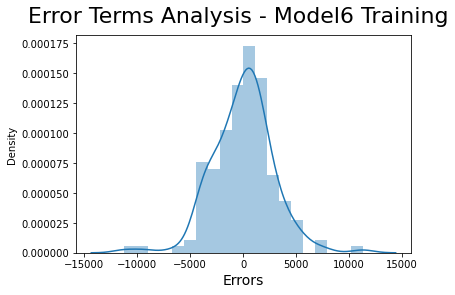

In [72]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred_model6), bins = 20)
fig.suptitle('Error Terms Analysis - Model6 Training', fontsize = 22)                   
plt.xlabel('Errors', fontsize = 14)

In [73]:
print('R2 score on training set {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred_model6)))


R2 score on training set 0.8618538223115595


**ANALYSIS ON TEST SET**

In [74]:
y_test = df_test.pop('price')
X_test = df_test

In [75]:
test_cols = X_test.columns

In [76]:
X_test[test_cols] = scaler.transform(X_test[test_cols])
X_test.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,symboling,citympg,highwaympg,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
15,0.801817,1.234887,0.461713,1.319744,2.046956,1.112308,1.927399,-0.727380,-1.476237,-1.336311,...,2.683282,0.0,-0.078326,-0.136505,-0.078326,-0.268133,0.643268,-0.268133,-0.254824,-0.136505
9,0.129623,0.338150,0.934083,0.972939,0.113653,-0.709646,1.378842,-0.727380,-1.476237,-1.336311,...,-0.372678,0.0,-0.078326,-0.136505,-0.078326,-0.268133,0.643268,-0.268133,-0.254824,-0.136505
100,-0.256889,-0.060400,-0.341316,-0.498536,-0.158993,0.034009,-0.192025,-0.727380,0.313502,0.534144,...,-0.372678,0.0,-0.078326,-0.136505,-0.078326,-0.268133,0.643268,-0.268133,-0.254824,-0.136505
132,0.062403,1.035612,0.272765,0.198994,-0.134207,0.814846,0.132122,1.690668,-0.662719,-0.401083,...,-0.372678,0.0,-0.078326,-0.136505,-0.078326,-0.268133,0.643268,-0.268133,-0.254824,-0.136505
68,1.894133,1.392647,2.067771,2.338608,1.402522,0.963577,0.456269,-1.533396,-0.500016,-0.868697,...,-0.372678,0.0,-0.078326,-0.136505,-0.078326,-0.268133,0.643268,-0.268133,-0.254824,-0.136505


In [77]:
X_test_c = X_test

In [78]:
X_test_c['const']=1.0

In [79]:
X_test_model6 = X_test_c[X_train_model6.columns]

In [80]:
y_test_pred_model6 = model6.predict(X_test_model6)

Text(0.5, 0, 'Errors')

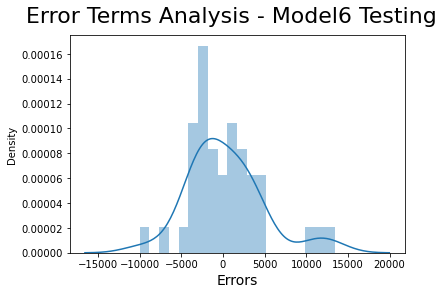

In [81]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred_model6), bins = 20)
fig.suptitle('Error Terms Analysis - Model6 Testing', fontsize = 22)                   
plt.xlabel('Errors', fontsize = 14)

In [82]:
print('R2 score on testing set {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred_model6)))


R2 score on testing set 0.7376791468639945


**MODEL 7**

In [83]:
print('Features used for model7 : {}'.format(X_train_model7.columns))

Features used for model7 : Index(['const', 'carwidth', 'curbweight', 'horsepower', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'cylindernumber_six',
       'enginetype_ohc', 'enginetype_ohcf'],
      dtype='object')


In [84]:
#Prediction on training set

y_train_pred_model7 = model7.predict(X_train_model7)

Text(0.5, 0, 'Errors')

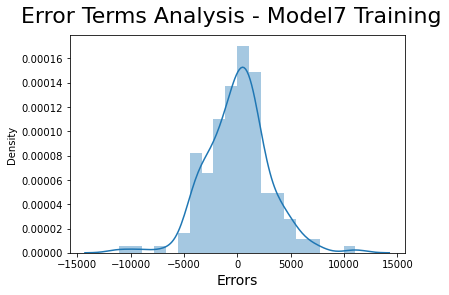

In [85]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred_model7), bins = 20)
fig.suptitle('Error Terms Analysis - Model7 Training', fontsize = 22)                   
plt.xlabel('Errors', fontsize = 14)

In [86]:
print('R2 score on training set (model7) {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred_model7)))


R2 score on training set (model7) 0.8561545331607898


In [87]:
X_test_model7 = X_test_c[X_train_model7.columns]

In [88]:
y_test_pred_model7 = model7.predict(X_test_model7)

Text(0.5, 0, 'Errors')

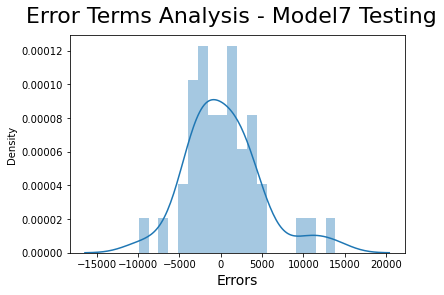

In [89]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred_model7), bins = 20)
fig.suptitle('Error Terms Analysis - Model7 Testing', fontsize = 22)                   
plt.xlabel('Errors', fontsize = 14)

In [90]:
print('R2 score on testing set {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred_model7)))


R2 score on testing set 0.7410085448514506


**MODEL
10**

In [91]:
y_train_pred_model10 = model10.predict(X_train_model10)

Text(0.5, 0, 'Errors')

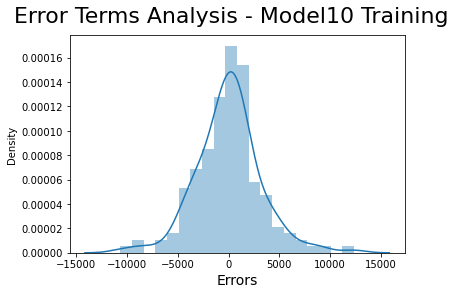

In [92]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred_model10), bins = 20)
fig.suptitle('Error Terms Analysis - Model10 Training', fontsize = 22)                   
plt.xlabel('Errors', fontsize = 14)

In [93]:
print('R2 score on training set (model10) {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred_model10)))


R2 score on training set (model10) 0.8278666764282631


In [94]:
X_test_model10 = X_test_c[X_train_model10.columns]

In [95]:
y_test_pred_model10 = model10.predict(X_test_model10)

Text(0.5, 0, 'Errors')

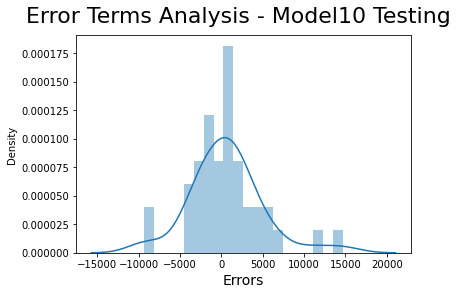

In [96]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred_model10), bins = 20)
fig.suptitle('Error Terms Analysis - Model10 Testing', fontsize = 22)                   
plt.xlabel('Errors', fontsize = 14)

In [97]:
print('R2 score on testing set {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred_model10)))

R2 score on testing set 0.7528149076707557


In [98]:
pickle.dump(model10, open('PricePrediction.pkl','wb'))

**From the above analysis on train and test data, we can conclude that model10 has the best accuracy**

In [99]:
print('Features used for model10 - {}'.format(X_train_model10.columns))

Features used for model10 - Index(['const', 'curbweight', 'horsepower', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'cylindernumber_six'],
      dtype='object')
